In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.75, 4.0)

import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")

import mne
mne.utils.set_log_level('error')

import numpy as np
import local
from models.preprocessing import utils

In [2]:
d = "../../data/reinhartlab/multimodal/cg/Epochs/"
ext_in = ".stimulus-epo.fif.gz"
box = utils.select_dataset(d,ext_in);box

In [44]:
files = [d+f+ext_in for f in utils.get_selection(box)]

In [39]:
def get_fband_epochstfr(epochs,fband,n_cycles=3,n_jobs=1):
    epochstfr = mne.time_frequency.tfr_morlet(epochs,fband,n_cycles,n_jobs=n_jobs,return_itc=False,average=False)
    epochstfr.data = np.mean(epochstfr.data,axis=2,keepdims=True)
    epochstfr.freqs = np.mean(epochstfr.freqs,keepdims=True)
    return epochstfr

def run_epochs(fname,condition,fband):
    return get_fband_epochstfr(mne.read_epochs(fname)[condition],fband,n_jobs=60)

In [45]:
epochstfr = [run_epochs(f,"BlockType in {} & FeedbackType == {}".format(["visual/right","visual/left"],"'negative'"),[9,11]) for f in files]

In [5]:
# merge epochstfr (using mne.concatenate_epochs())
# crop to bsl, time intervals
# get means per trial/interval
# permutation test
# plot topomap

In [77]:
datas = np.squeeze(np.vstack([e.data for i,e in enumerate(epochstfr) if i not in [1,5,8,16]]))

In [5]:
def get_raw(filename):
    print(filename)
    r = mne.io.read_raw_fif(filename, preload=True)
    if not 'TP10' in r.info['ch_names']:
        mne.add_reference_channels(r,'TP10',copy=False)
    r.set_eeg_reference(['TP9','TP10'])
    return r

In [6]:
def get_fband_erp(filename,fband,event_id):
    raw = get_raw(filename)
    events,eid = mne.events_from_annotations(raw);
    raw.filter(*fband);
    return mne.Epochs(raw,picks='eeg',events=events,event_id=[eid[i] for i in event_id],detrend=1,tmin=-.5,tmax=2.5,baseline=(-.1,0),preload=True)

In [7]:
def get_fband_means(filename,fband,event_id):
    enr = get_fband_erp(filename,fband,event_id)
    info = enr.info
    bsl = np.mean(enr.copy().crop(-.25,0).get_data(),2)
    act = [np.mean(enr.copy().crop((t-1)*.5+.25,t*.5).get_data(),2) for t in [1,2,3,4,5]]
    return (info,bsl,act)

# NOTE: I SWITCHED TO .25 INTERVALS, REVERT TO .5 AFTERWARDS

In [8]:
def plot_topomap(bsl,act,info,alpha,ax):
    T,c,p,r = mne.stats.permutation_cluster_test([np.concatenate(bsl),np.concatenate(act)])
    m = np.ones((60,1))>1
    for s,t in zip(c,p):
        if t<alpha:
            m[s]=True
    mne.viz.plot_topomap(T,info[1],mask=np.squeeze(m),cmap='Spectral_r',axes=ax,show=False);

In [9]:
# get filenames
d = "../../../data/reinhartlab/multimodal/cg/"
files = [join(d, f) for f in listdir(d) if isfile(join(d, f)) and ".raw.fif.gz" in f]
info=[None]*len(files); bsl=[None]*len(files); act=[None]*len(files)

In [29]:
data = [get_fband_means(f,[3,8],['Stim/S 20','Stim/S 21','Stim/S 22','Stim/S 23']) for f in files]
info = [d[0] for d in data]
bsl = [d[1] for d in data]
act = [d[2] for d in data]

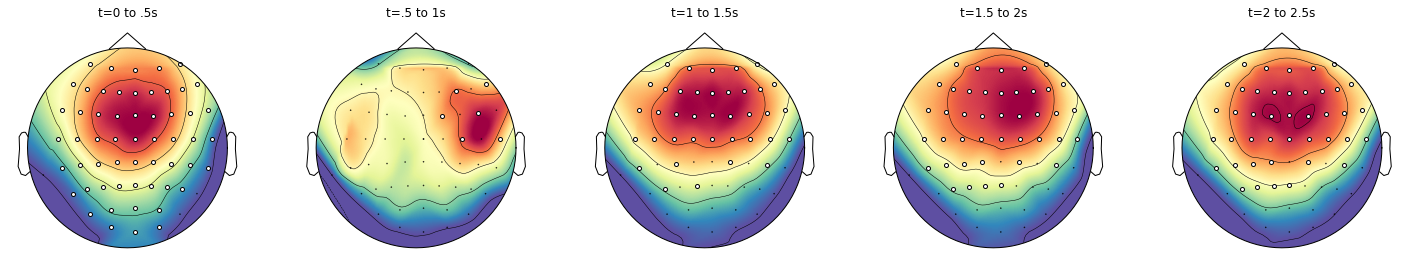

In [22]:
fig,axs = plt.subplots(1,5,figsize=(25,5))
tt = ["t=0 to .5s","t=.5 to 1s","t=1 to 1.5s","t=1.5 to 2s","t=2 to 2.5s"]
for i,ax in enumerate(axs):
    plot_topomap(bsl,[a[i] for a in act],info,.05,ax);
    ax.set_title(tt[i])

In [28]:
#data = [get_fband_means(f,[9,14],['Stim/S 16','Stim/S 17','Stim/S 18','Stim/S 19']) for f in files]
info = [d[0] for d in data]
bsl = [d[1] for d in data]
act = [d[2] for d in data]

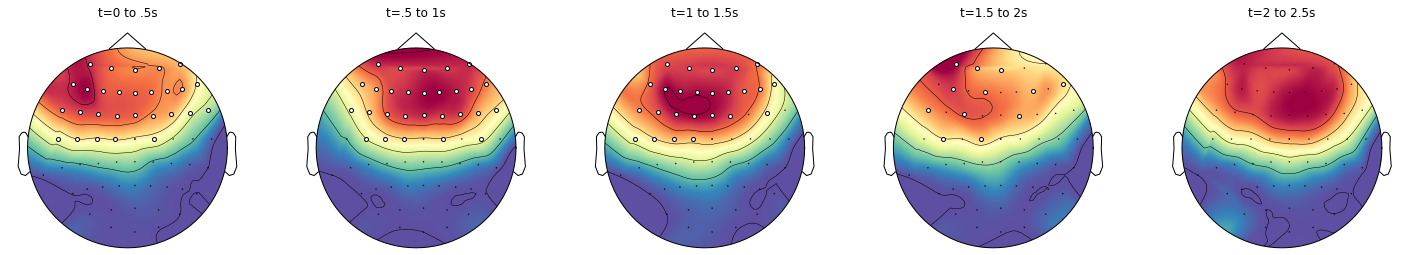

In [24]:
fig,axs = plt.subplots(1,5,figsize=(25,5))
tt = ["t=0 to .5s","t=.5 to 1s","t=1 to 1.5s","t=1.5 to 2s","t=2 to 2.5s"]
for i,ax in enumerate(axs):
    plot_topomap(bsl,[a[i] for a in act],info,.05,ax);
    ax.set_title(tt[i])

In [27]:
#data = [get_fband_means(f,[18,24],['Stim/S 16','Stim/S 17','Stim/S 18','Stim/S 19']) for f in files]
info = [d[0] for d in data]
bsl = [d[1] for d in data]
act = [d[2] for d in data]

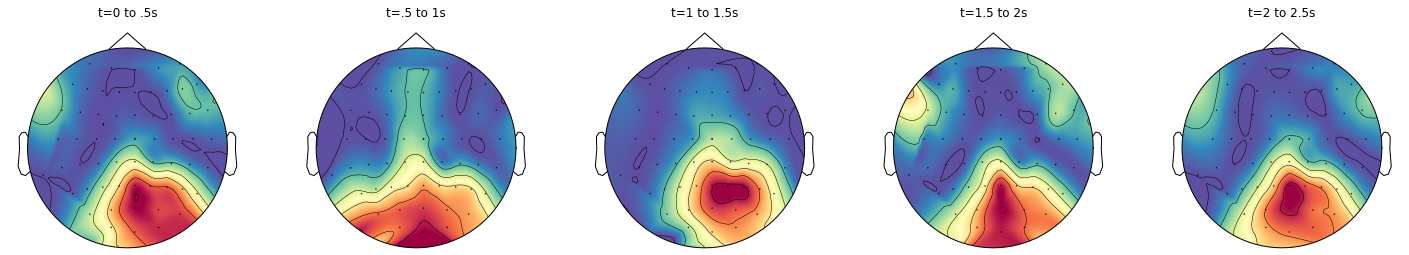

In [26]:
fig,axs = plt.subplots(1,5,figsize=(25,5))
tt = ["t=0 to .5s","t=.5 to 1s","t=1 to 1.5s","t=1.5 to 2s","t=2 to 2.5s"]
for i,ax in enumerate(axs):
    plot_topomap(bsl,[a[i] for a in act],info,.05,ax);
    ax.set_title(tt[i])

In [13]:
#data = [get_fband_means(f,[23,28],['Stim/S 20','Stim/S 21','Stim/S 22','Stim/S 23']) for f in files]
info = [d[0] for d in data]
bsl = [d[1] for d in data]
act = [d[2] for d in data]

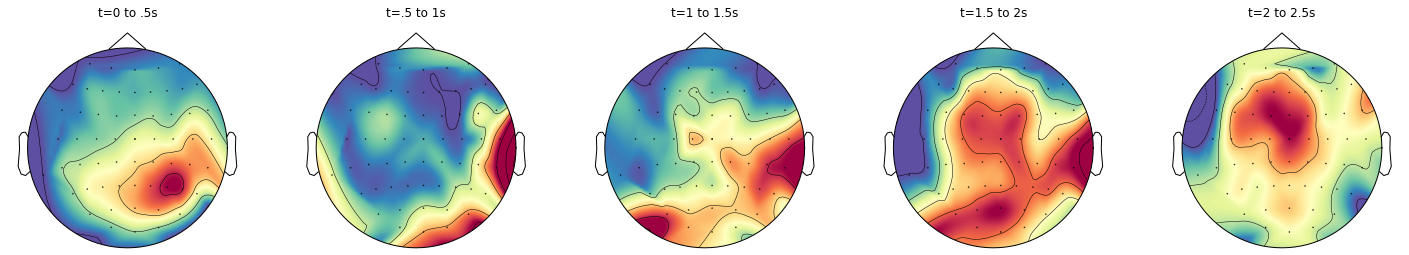

In [12]:
fig,axs = plt.subplots(1,5,figsize=(25,5))
tt = ["t=0 to .5s","t=.5 to 1s","t=1 to 1.5s","t=1.5 to 2s","t=2 to 2.5s"]
for i,ax in enumerate(axs):
    plot_topomap(bsl,[a[i] for a in act],info,.05,ax);
    ax.set_title(tt[i])

In [47]:
files[8]

'../../data/reinhartlab/multimodal/cg/Epochs/MulitModal_EEG_113CG_2.stimulus-epo.fif.gz'